### Raport z zadania metoda gradientu prostego
## Import bibliotek

In [1]:
from tabulate import tabulate
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D
from gradientdescent import GradientDescent
import numpy as np

## Wykresy zadanych funkcji

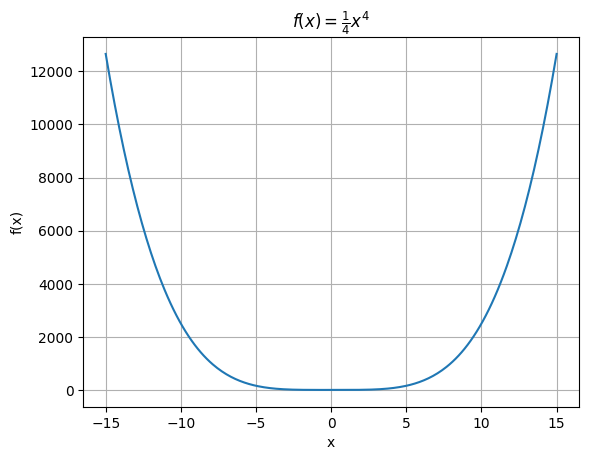

In [2]:
plotter_1D(f1, domain=(-15, 15), num_points=300, title="$f(x) = \\frac{1}{4}x^4$", x_label='x', y_label='f(x)')

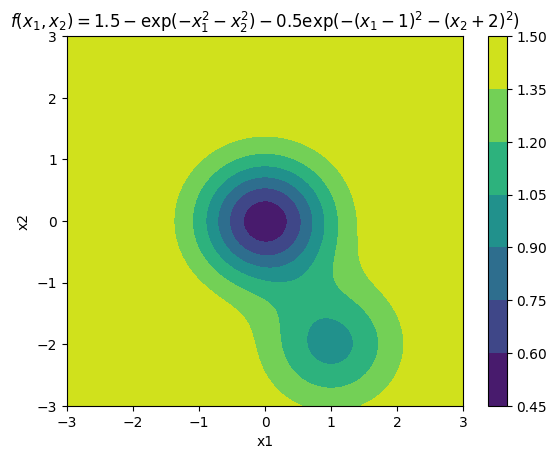

In [4]:
plotter_2D(f2, domain=[(-3, 3), (-3, 3)], title="$f(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

### Cel eksperymentów
Zamierzam sprawdzić działanie algorytmów dla różnych punktów startowych oraz hiperparametrów. Przeprowadzę badanie:
- 10 losowo wybranych punktów startowych
- 6 różnych wartości kroku gradientu (step/learning rate)
- 3 różnych liczb iteracji
Spośród wyników dla każdej funkcji wyłonię po dwie najlepsze oraz dwie najgorsze wartości i poddam je dalszej analizie.

## Funkcja 1

In [ ]:
fx = GradientDescent(0.03, 10)
fx.solve(gradient_f1, 2.82, f1)
plotter_1D(f1, x_range=(-3,3), num_points=100, title="$f(x) = \\frac{1}{4}x^4$", y_label='f(x)')

In [ ]:
gx = GradientDescent(0.4, 15)
gx.solve(gradient_f2, np.array([1.2, -0.8]), f2)
plotter_2D(f2, domain=[(-2, 2), (-2, 2)], num_points=100,
              title="$f(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

In [ ]:
test_beta = [0.01, 0.03, 0.1, 0.15, 0.23, 0.25, 0.35, 0.46, 0.68]
descent_values = []
experiment_beta_fx = GradientDescent(0.01, 100)
for beta in test_beta:
    experiment_beta_fx.set_learning_rate(beta)
    descent_values.append(experiment_beta_fx.solve(experiment_beta_fx.gradient_f1, 2.79, experiment_beta_fx.f1))

table_beta_fx = {'beta' : test_beta, 'initial x0' : [2.79]*9, 'Final x' : descent_values, 'Iterations' : [100]*9}
print(tabulate(table_beta_fx, headers='keys', tablefmt='fancy_grid'))

In [ ]:
test_iteration = [5, 10, 100, 500, 1000, 5000, 10000, 15000, 20000]
descent_values = []
experiment_iter_fx = GradientDescent(0.01, 100)
for n_iter in test_iteration:
    experiment_iter_fx.set_iterations(n_iter)
    descent_values.append(experiment_iter_fx.solve(experiment_iter_fx.gradient_f1, 2.79, experiment_iter_fx.f1))

table_iter_fx = {'Iterations' : test_iteration, 'beta' : [0.01] * 9, 'initial x0' : [2.79]*9, 'Final x' : descent_values, }
print(tabulate(table_iter_fx, headers='keys', tablefmt='fancy_grid'))

In [ ]:
test_start = np.random.uniform(-10, 10, 9)
descent_values = []
experiment_start_fx = GradientDescent(0.01, 1000)
for x0 in test_start:
    descent_values.append(experiment_start_fx.solve(experiment_start_fx.gradient_f1, x0, experiment_start_fx.f1))

table_start_fx = {'beta' : [0.01] * 9, 'Iterations' : [1000] * 9,  'initial x0' : test_start, 'Final x' : descent_values, }
print(tabulate(table_start_fx, headers='keys', tablefmt='fancy_grid'))